In [5]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

pandas2ri.activate()

In [6]:
# Defining the R script and loading the instance in Python
r = robjects.r
r['source']('exec_optim.R')

# Loading the function we have defined in R.
exec_function_r = robjects.globalenv['hydro_prob']

In [9]:
result_files = [
    ("./results/new_data/config_simple_5043_0_MSE.csv",0,"MSE"),
    ("./results/new_data/config_simple_5043_1_MSE.csv",1,"MSE"),
    ("./results/new_data/config_simple_5043_2_MSE.csv",2,"MSE"),
    ("./results/new_data/config_simple_5043_3_MSE.csv",3,"MSE"),
    ("./results/new_data/config_simple_5043_0_NSE.csv",0,"NSE"),
    ("./results/new_data/config_simple_5043_1_NSE.csv",1,"NSE"),
    ("./results/new_data/config_simple_5043_2_NSE.csv",2,"NSE"),
    ("./results/new_data/config_simple_5043_3_NSE.csv",3,"NSE"),
    ("./results/new_data/config_simple_5043_0_R2.csv",0,"R2"),
    ("./results/new_data/config_simple_5043_1_R2.csv",1,"R2"),
    ("./results/new_data/config_simple_5043_2_R2.csv",2,"R2"),
    ("./results/new_data/config_simple_5043_3_R2.csv",3,"R2"),
    ("./results/new_data/config_simple_5043_0_KGE.csv",0,"KGE"),
    ("./results/new_data/config_simple_5043_1_KGE.csv",1,"KGE"),
    ("./results/new_data/config_simple_5043_2_KGE.csv",2,"KGE"),
    ("./results/new_data/config_simple_5043_3_KGE.csv",3,"KGE"),
]

import os

df = pd.DataFrame(columns=["model", "target", "MSE", "RMSE", "NSE", "R2", "KGE"])
for file_name, model, target in result_files:
    print(file_name, "Yes" if os.path.exists(file_name) else "No")
    params = np.loadtxt(file_name, delimiter=",", max_rows=1)
    
    metrics = exec_function_r(model, params)
    df.loc[len(df)] = [model, target, metrics[0], metrics[1], metrics[3], metrics[4], metrics[5]]
    

./results/new_data/config_simple_5043_0_MSE.csv Yes
./results/new_data/config_simple_5043_1_MSE.csv Yes
./results/new_data/config_simple_5043_2_MSE.csv Yes
./results/new_data/config_simple_5043_3_MSE.csv Yes
./results/new_data/config_simple_5043_0_NSE.csv Yes
./results/new_data/config_simple_5043_1_NSE.csv Yes
./results/new_data/config_simple_5043_2_NSE.csv Yes
./results/new_data/config_simple_5043_3_NSE.csv Yes
./results/new_data/config_simple_5043_0_R2.csv Yes
./results/new_data/config_simple_5043_1_R2.csv Yes
./results/new_data/config_simple_5043_2_R2.csv Yes
./results/new_data/config_simple_5043_3_R2.csv Yes
./results/new_data/config_simple_5043_0_KGE.csv Yes
./results/new_data/config_simple_5043_1_KGE.csv Yes
./results/new_data/config_simple_5043_2_KGE.csv Yes
./results/new_data/config_simple_5043_3_KGE.csv Yes


In [10]:
df.sort_values("NSE")

,model,target,MSE,RMSE,NSE,R2,KGE
8,0,R2,307.987935,17.549585,-0.490527,0.526709,0.219069
11,3,R2,307.895917,17.546963,-0.490081,0.526709,0.219215
10,2,R2,252.781364,15.899099,-0.223351,0.532523,0.342765
9,1,R2,180.111341,13.420557,0.128340,0.526709,0.557808
4,0,NSE,147.830689,12.158564,0.284564,0.395069,0.613720
12,0,KGE,142.263350,11.927420,0.311508,0.457734,0.670039
0,0,MSE,134.277833,11.587831,0.350154,0.412778,0.615495
15,3,KGE,122.822246,11.082520,0.405594,0.502515,0.707336
7,3,NSE,121.890578,11.040407,0.410103,0.462845,0.642264
13,1,KGE,121.030014,11.001364,0.414268,0.507883,0.711547


In [11]:
df

,model,target,MSE,RMSE,NSE,R2,KGE
0,0,MSE,134.277833,11.587831,0.350154,0.412778,0.615495
1,1,MSE,109.551080,10.466665,0.469821,0.482009,0.627938
2,2,MSE,109.550514,10.466638,0.469823,0.482009,0.627860
3,3,MSE,115.768811,10.759592,0.439730,0.474858,0.654239
4,0,NSE,147.830689,12.158564,0.284564,0.395069,0.613720
5,1,NSE,109.873348,10.482049,0.468261,0.477890,0.617405
6,2,NSE,109.079549,10.444116,0.472103,0.485515,0.633603
7,3,NSE,121.890578,11.040407,0.410103,0.462845,0.642264
8,0,R2,307.987935,17.549585,-0.490527,0.526709,0.219069
9,1,R2,180.111341,13.420557,0.128340,0.526709,0.557808


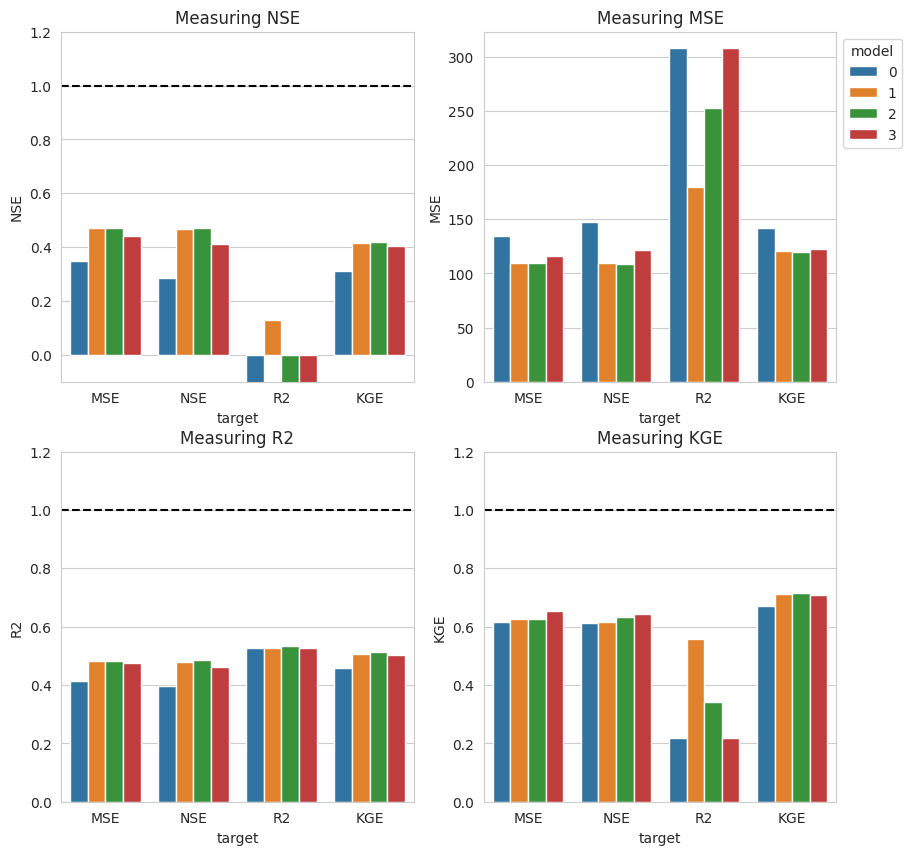

In [15]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))


metric_measures = ["NSE", "MSE", "R2", "KGE"]
for idx, metric in enumerate(["NSE", "MSE", "R2", "KGE"]):
    ax = axes[idx//2, idx%2]
    # hist_ax = sns.barplot(data=data_to_plot, x="target", y=metric_measure, hue="model", ax=ax)
    hist_ax = sns.barplot(data=df, x="target", y=metric_measures[idx], hue="model", ax=ax)
    hist_ax.set(title = f"Measuring {metric}", ylim=(0, None))

    if metric == "NSE":
        ax.axhline(1, color="k", linestyle="--")
        hist_ax.set(ylim=(-0.1, 1.2))
    elif metric != "MSE":
        ax.axhline(1, color="k", linestyle="--")
        hist_ax.set(ylim=(0, 1.2))

    if idx == 1:
        sns.move_legend(hist_ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        hist_ax.get_legend().remove()